In [1]:
from pathlib import Path

import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.warp import Resampling
from rasterio.transform import array_bounds

import eda as eda
from luts import ice_zones, ice_years, ice_eras
from config import INPUT_FLAT_DIR, BEAUFORT_DIR, CHUKCHI_DIR

In [ ]:
high_value_data_paths = []
for region in ice_zones:
    for era in ice_eras:
        high_value_data_paths.append(Path(INPUT_FLAT_DIR / "EM24" / region / "AllSeasonsAnalysis2023" / f"MonthlySLIEs_{era}"))

for directory in high_value_data_paths:
    print(directory)
    eda.test_geotiff_metadata_for_conformity(directory, geotiff_metadata=None, str_to_match="MMM")
    eda.plot_random_sample(directory)
    
    

In [ ]:
geotiffs_to_ingest = []
metas = []

for region in ice_zones:
    for era in ice_eras:
        target = Path(INPUT_FLAT_DIR / "EM24" / region / "AllSeasonsAnalysis2023" / f"MonthlySLIEs_{era}")
        tiffs = eda.list_geotiffs(target, str_to_match="MMM")
        _, meta = eda.fetch_all_geotiff_metadata(target, str_to_match="MMM")
        geotiffs_to_ingest = geotiffs_to_ingest + tiffs
        metas = metas + meta
geotiffs_to_ingest[0]

In [ ]:
metas[0]

In [ ]:
def rename(fp):
    if "Chuk" == fp.parent.parent.parent.name:
        zone = "Chukchi"
        out_dir = CHUKCHI_DIR
    elif "Beau" == fp.parent.parent.parent.name:
        zone = "Beaufort"
        out_dir = BEAUFORT_DIR
    else:
        print(fp)
    
    fname = fp.name
    month = fname.split("_")[1]
    
    if "1996-05" in fname:
        era = "1996-2005"
    elif "2005-14" in fname:
        era = "2005-2014"
    elif "2014-23" in fname:
        era = "2014-2023"
    else:
        print(fp)
    
    new_name = f"{zone}_{month}_{era}_SLIE_MMM_summary.tif"
    new_fp = out_dir / new_name
    return new_fp

rename(geotiffs_to_ingest[0])

In [ ]:
def reproject_raster(file):

    dst_crs = rio.crs.CRS.from_epsg(3338)

    with rio.open(file) as src:

        # compute the new affine transformation, width and height
        warp_transform, width, height = rio.warp.calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        # define the output raster profile
        out_profile = src.profile.copy()
        out_profile.update(
            {
                "crs": dst_crs,
                "transform": warp_transform,
                "width": width,
                "height": height,
                "bounds": array_bounds(height, width, warp_transform),
            }
        )

        # create the new raster file
        out_file = rename(file)
        
        with rio.open(out_file, "w", **out_profile) as dst:
            # reproject the input raster data
            rio.warp.reproject(
                source=src.read(1),
                destination=rio.band(dst, 1),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=warp_transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,  # NN is default, but explicit here for easy change or experimentation later
            )


In [ ]:
for tiff in geotiffs_to_ingest:
    reproject_raster(tiff)

In [12]:
!ls $BEAUFORT_DIR

Beaufort_01_1996-2005_SLIE_MMM_summary.tif
Beaufort_01_2005-2014_SLIE_MMM_summary.tif
Beaufort_01_2014-2023_SLIE_MMM_summary.tif
Beaufort_02_1996-2005_SLIE_MMM_summary.tif
Beaufort_02_2005-2014_SLIE_MMM_summary.tif
Beaufort_02_2014-2023_SLIE_MMM_summary.tif
Beaufort_03_1996-2005_SLIE_MMM_summary.tif
Beaufort_03_2005-2014_SLIE_MMM_summary.tif
Beaufort_03_2014-2023_SLIE_MMM_summary.tif
Beaufort_04_1996-2005_SLIE_MMM_summary.tif
Beaufort_04_2005-2014_SLIE_MMM_summary.tif
Beaufort_04_2014-2023_SLIE_MMM_summary.tif
Beaufort_05_1996-2005_SLIE_MMM_summary.tif
Beaufort_05_2005-2014_SLIE_MMM_summary.tif
Beaufort_05_2014-2023_SLIE_MMM_summary.tif
Beaufort_06_1996-2005_SLIE_MMM_summary.tif
Beaufort_06_2005-2014_SLIE_MMM_summary.tif
Beaufort_06_2014-2023_SLIE_MMM_summary.tif
Beaufort_07_1996-2005_SLIE_MMM_summary.tif
Beaufort_07_2005-2014_SLIE_MMM_summary.tif
Beaufort_07_2014-2023_SLIE_MMM_summary.tif
Beaufort_10_1996-2005_SLIE_MMM_summary.tif
Beaufort_10_2005-2014_SLIE_MMM_summary.tif
Beaufort_10

In [15]:
!ls $CHUKCHI_DIR

Chukchi_01_1996-2005_SLIE_MMM_summary.tif
Chukchi_01_2005-2014_SLIE_MMM_summary.tif
Chukchi_01_2014-2023_SLIE_MMM_summary.tif
Chukchi_02_1996-2005_SLIE_MMM_summary.tif
Chukchi_02_2005-2014_SLIE_MMM_summary.tif
Chukchi_02_2014-2023_SLIE_MMM_summary.tif
Chukchi_03_1996-2005_SLIE_MMM_summary.tif
Chukchi_03_2005-2014_SLIE_MMM_summary.tif
Chukchi_03_2014-2023_SLIE_MMM_summary.tif
Chukchi_04_1996-2005_SLIE_MMM_summary.tif
Chukchi_04_2005-2014_SLIE_MMM_summary.tif
Chukchi_04_2014-2023_SLIE_MMM_summary.tif
Chukchi_05_1996-2005_SLIE_MMM_summary.tif
Chukchi_05_2005-2014_SLIE_MMM_summary.tif
Chukchi_05_2014-2023_SLIE_MMM_summary.tif
Chukchi_06_1996-2005_SLIE_MMM_summary.tif
Chukchi_06_2005-2014_SLIE_MMM_summary.tif
Chukchi_06_2014-2023_SLIE_MMM_summary.tif
Chukchi_07_1996-2005_SLIE_MMM_summary.tif
Chukchi_07_2005-2014_SLIE_MMM_summary.tif
Chukchi_10_1996-2005_SLIE_MMM_summary.tif
Chukchi_10_2005-2014_SLIE_MMM_summary.tif
Chukchi_10_2014-2023_SLIE_MMM_summary.tif
Chukchi_11_1996-2005_SLIE_MMM_summ

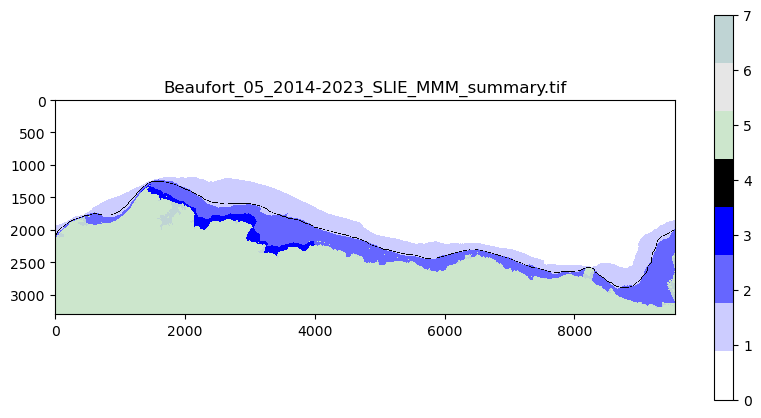

In [5]:
eda.plot_random_sample(BEAUFORT_DIR)

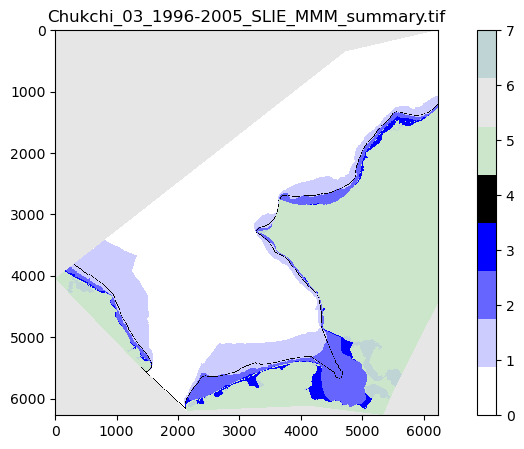

In [10]:
eda.plot_random_sample(CHUKCHI_DIR)

In [14]:
# number of files should 10 months * 3 era in each directory
assert len(eda.list_geotiffs(BEAUFORT_DIR)) == 30
assert len(eda.list_geotiffs(CHUKCHI_DIR)) == 30

AssertionError: 